In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
from multiprocessing.pool import ThreadPool

In [3]:
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
columns = ['img_path','label_diag']
labels_aptos = 'C:/Users/smirn/Desktop/RetinaDataset/APTOS_train_Labels.csv'
labels_kaggle = 'C:/Users/smirn/Desktop/RetinaDataset/Kaggle_train_Labels.csv'

In [4]:
ds1 =  pd.read_csv(labels_aptos,names = columns, sep = ',')
ds2 =  pd.read_csv(labels_kaggle,names = columns, sep = ',')

In [5]:
ds1

,img_path,label_diag
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0
...,...,...
3657,ffa47f6a7bf4,2
3658,ffc04fed30e6,0
3659,ffcf7b45f213,2
3660,ffd97f8cd5aa,0


In [6]:
ds2

,img_path,label_diag
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
...,...,...
35121,44347_right,0
35122,44348_left,0
35123,44348_right,0
35124,44349_left,0


In [7]:
ds1_stat = ds1['label_diag'].value_counts(sort=False)
ds2_stat = ds2['label_diag'].value_counts(sort=False)

In [8]:
ds1_stat

label_diag
2     999
4     295
1     370
0    1805
3     193
Name: count, dtype: int64

In [9]:
ds2_stat

label_diag
0    25810
1     2443
2     5292
4      708
3      873
Name: count, dtype: int64

In [10]:
labels_num = [i for i in range(5)]

In [11]:
labels_num

[0, 1, 2, 3, 4]

In [12]:
def count_labels(ds1_st,ds2_st):
    stat_count=[]
    #global label_num11
    for i in labels_num:
        count = ds1_st[i]+ds2_st[i]
        stat_count.append(count)
    return stat_count

In [13]:
stat_count=count_labels(ds1_stat,ds2_stat)

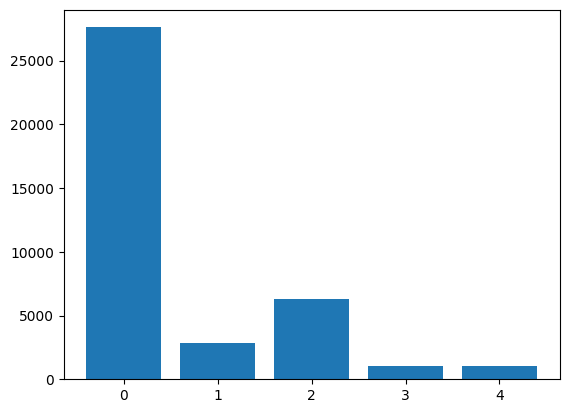

In [14]:
import matplotlib.pyplot as plt

plt.bar(labels_num,stat_count)
plt.show()

In [15]:
for i in range(5):
    print(f'Количество картинок с меткой {i}: {stat_count[i]}')

Количество картинок с меткой 0: 27615
Количество картинок с меткой 1: 2813
Количество картинок с меткой 2: 6291
Количество картинок с меткой 3: 1066
Количество картинок с меткой 4: 1003


In [16]:
label_0 = ds1.loc[ds1['label_diag']==0]['img_path'].to_numpy()
label_1= ds1.loc[ds1['label_diag']==1]['img_path'].to_numpy()
label_2= ds1.loc[ds1['label_diag']==2]['img_path'].to_numpy()
label_3= ds1.loc[ds1['label_diag']==3]['img_path'].to_numpy()
label_4= ds1.loc[ds1['label_diag']==4]['img_path'].to_numpy()
labels=(label_0,label_1,label_2,label_3,label_4)

In [17]:
#!mkdir 'Desktop\\RetinaDataset\\Train'
!mkdir 'Desktop\\RetinaDataset\\Train\\0'
!mkdir 'Desktop\\RetinaDataset\\Train\\1'
!mkdir 'Desktop\\RetinaDataset\\Train\\2'
!mkdir 'Desktop\\RetinaDataset\\Train\\3'
!mkdir 'Desktop\\RetinaDataset\\Train\\4'

A subdirectory or file 'Desktop\\RetinaDataset\\Train\\0' already exists.
A subdirectory or file 'Desktop\\RetinaDataset\\Train\\1' already exists.
A subdirectory or file 'Desktop\\RetinaDataset\\Train\\2' already exists.
A subdirectory or file 'Desktop\\RetinaDataset\\Train\\3' already exists.
A subdirectory or file 'Desktop\\RetinaDataset\\Train\\4' already exists.


In [3]:
Old_Folder = os.path.join('Desktop','RetinaDataset','APTOS_train_images')
New_Folder = os.path.join('Desktop','RetinaDataset','Train')

In [19]:
New_Folder

'Desktop\\RetinaDataset\\Train'

In [20]:
import shutil
count = 0
for i in range(5):
    for j in labels[i]:
        j = j+'.png'
        path = os.path.join(Old_Folder,j)
        path_new = os.path.join(New_Folder,str(i),j)
        shutil.copyfile(path,path_new)
        count += 1
        #print(path)
        #print(path_new)
    
        



In [21]:
kagl_label_0 = ds2.loc[ds2['label_diag']==0]['img_path'].to_numpy()
kagl_label_1= ds2.loc[ds2['label_diag']==1]['img_path'].to_numpy()
kagl_label_2= ds2.loc[ds2['label_diag']==2]['img_path'].to_numpy()
kagl_label_3= ds2.loc[ds2['label_diag']==3]['img_path'].to_numpy()
kagl_label_4= ds2.loc[ds2['label_diag']==4]['img_path'].to_numpy()
kagl_labels=(kagl_label_0,kagl_label_1,kagl_label_2,kagl_label_3,kagl_label_4)

In [22]:
Old_Folder_kagl = os.path.join('Desktop','RetinaDataset','Kaggle_train')

In [23]:
import shutil
for i in range(5):
    for j in kagl_labels[i]:
        j = j+'.jpeg'
        path = os.path.join(Old_Folder_kagl,j)
        path_new = os.path.join(New_Folder,str(i),j)
        shutil.copyfile(path,path_new)
    
    

In [24]:
import random

In [27]:
#o_label_delete = os.listdir(os.path.join(New_Folder,str(0)))
#files_remove = random.sample(o_label_delete,26000)

In [27]:
for i in files_remove:
    path_rm = os.path.join(New_Folder,str(0),i)
    os.remove(path_rm)

In [28]:
one_label_delete = os.listdir(os.path.join(New_Folder,str(1)))
files_two_remove = random.sample(one_label_delete,1300)

In [29]:
for i in files_two_remove:
    path_rm = os.path.join(New_Folder,str(1),i)
    os.remove(path_rm)

In [30]:
two_label_delete = os.listdir(os.path.join(New_Folder,str(2)))
files_two_remove = random.sample(two_label_delete,4300)

In [31]:
for i in files_two_remove:
    path_rm = os.path.join(New_Folder,str(2),i)
    os.remove(path_rm)

In [37]:
from PIL import Image

In [38]:
newsize = (512, 512)
def resize_imgs(dir,list):
    for i in range(len(list)):
        name = list[i]
        path = os.path.join(dir,name)
        img = Image.open(path)
        img = img.resize(newsize)
        #print(img.size)
        #print(os.path.join(dir,name))
        img.save(os.path.join(dir,name))


In [5]:
zero_label_resize = os.listdir(os.path.join(New_Folder,'preprocessed',str(0)))
one_label_resize = os.listdir(os.path.join(New_Folder,'preprocessed',str(1)))
two_label_resize = os.listdir(os.path.join(New_Folder,'preprocessed',str(2)))
three_label_resize = os.listdir(os.path.join(New_Folder,'preprocessed',str(3)))
four_label_resize = os.listdir(os.path.join(New_Folder,'preprocessed',str(4)))
zero_dir = os.path.join(New_Folder,'preprocessed',str(0))
one_dir = os.path.join(New_Folder,'preprocessed',str(1))
two_dir = os.path.join(New_Folder,'preprocessed',str(2))
three_dir = os.path.join(New_Folder,'preprocessed',str(3))
four_dir = os.path.join(New_Folder,'preprocessed',str(4))

In [6]:
print(zero_dir)
print(len(zero_label_resize))
print(one_dir)
print(len(one_label_resize))
print(two_dir)
print(len(two_label_resize))
print(three_dir)
print(len(three_label_resize))
print(four_dir)
print(len(four_label_resize))

Desktop\RetinaDataset\Train\preprocessed\0
27615
Desktop\RetinaDataset\Train\preprocessed\1
2813
Desktop\RetinaDataset\Train\preprocessed\2
6291
Desktop\RetinaDataset\Train\preprocessed\3
1066
Desktop\RetinaDataset\Train\preprocessed\4
1003


In [28]:
resize_imgs(zero_dir,zero_label_resize)
print('Folder zero processed')
resize_imgs(one_dir,one_label_resize)
print('Folder one processed')
resize_imgs(two_dir,two_label_resize)
print('Folder two processed')
resize_imgs(three_dir,three_label_resize)
print('Folder three processed')
resize_imgs(four_dir,four_label_resize)
print('Done')

NameError: name 'resize_imgs' is not defined

In [42]:
st0 = len(zero_label_resize)
st1 = len(one_label_resize)
st2 = len(two_label_resize)
st3 = len(three_label_resize)
st4 = len(four_label_resize)
labels_num = [i for i in range(5)]
stat_count = (st0,st1,st2,st3,st4)

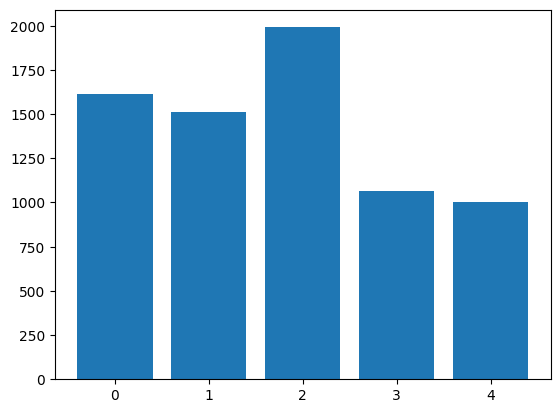

In [43]:
import matplotlib.pyplot as plt

plt.bar(labels_num,stat_count)
plt.show()

In [40]:
New_Folder= os.path.join('Desktop','RetinaDataset','Train','preprocessed')

In [41]:
for i in range(len(zero_label_resize)):
    if zero_label_resize[i].split('.')[-1] == 'png':
        print(i)
        path_rm = os.path.join(New_Folder,str(0),zero_label_resize[i])
        os.remove(path_rm)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
126
127
360
361
751
752
753
754
755
1366
1367
1387
1994
1995
1996
1997
1998
2046
2687
2688
2689
2750
2946
3338
3409
3411
3412
3542
3735
3992
3993
3994
3995
4000
4015
4030
4194
4297
4347
4369
4975
5178
5187
5287
5288
5289
5290
5658
5751
5766
5797
5886
5949
6008
6009
6010
6011
6012
6074
6142
6348
6499
6622
6625
6626
6627
6628
6629
6630
6631
6632
6633
6634
6635
6636
6637
6638
6639
6640
6641
6642
6643
6644
6645
6646
6647
6648
6649
6650
6651
6652
6653
6654
6655
6656
6657
6658
6659
6660
6661
6662
6663
6664
6665
6666
6667
6668
6669
6670
6671
6672
6673
6814
6815
7168
7294
7329
7382
7689
7884
8003
8076
8215
8251
8382
8590
8857
9084
9212
9263
9277
9425
9813
9885
9886
9887
10050
10170
10456
10568

In [42]:
for i in range(len(one_label_resize)):
    if one_label_resize[i].split('.')[-1] == 'png':
        print(i)
        path_rm = os.path.join(New_Folder,str(1),one_label_resize[i])
        os.remove(path_rm)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
32
72
82
96
100
207
208
275
404
485
540
589
622
632
650
651
652
653
654
655
656
657
658
659
669
788
795
829
942
958
1024
1025
1106
1125
1132
1182
1247
1249
1250
1251
1252
1253
1254
1255
1256
1285
1311
1313
1381
1454
1499
1500
1540
1609
1615
1616
1621
1654
1658
1764
1778
1801
1802
1865
1866
1867
1868
1869
1870
1871
1884
1932
2121
2164
2167
2177
2194
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2227
2228
2229
2234
2238
2248
2249
2250
2254
2257
2264
2272
2277
2280
2285
2291
2296
2297
2300
2301
2307
2308
2311
2315
2323
2324
2325
2326
2327
2328
2329
2330
2333
2338
2339
2347
2351
2355
2358
2359
2363
2364
2368
2369
2373
2377
2382
2385
2387
2393
2405
2406
2407
2408
2409
2410
2411
2415
2423
2424
2434
2436
2439
2442
2459
2466
2467
2479
2485
2489
2490
2491
2492
2493
2494
2495
2496
2497
2505
2506
2507
2513
2517
2521
2528
2539
2540
2553
2559
2581
2582
2583
2584
2585
2586
2587
2588
2589
25

In [46]:
for i in range(len(two_label_resize)):
    if two_label_resize[i].split('.')[-1] == 'png':
        print(i)
        path_rm = os.path.join(New_Folder,str(2),two_label_resize[i])
        os.remove(path_rm)

0


FileNotFoundError: [WinError 2] The system cannot find the file specified: 'Desktop\\RetinaDataset\\Train\\preprocessed\\2\\000c1434d8d7.png'

In [47]:
for i in range(len(three_label_resize)):
    if three_label_resize[i].split('.')[-1] == 'png':
        print(i)
        path_rm = os.path.join(New_Folder,str(3),three_label_resize[i])
        os.remove(path_rm)

0


FileNotFoundError: [WinError 2] The system cannot find the file specified: 'Desktop\\RetinaDataset\\Train\\preprocessed\\3\\0104b032c141.png'

In [48]:
for i in range(len(four_label_resize)):
    if four_label_resize[i].split('.')[-1] == 'png':
        print(i)
        path_rm = os.path.join(New_Folder,str(4),four_label_resize[i])
        os.remove(path_rm)

0


FileNotFoundError: [WinError 2] The system cannot find the file specified: 'Desktop\\RetinaDataset\\Train\\preprocessed\\4\\001639a390f0.png'